In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('titanic.csv')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 


Populating the interactive namespace from numpy and matplotlib


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
data.shape

(891, 12)

In [31]:
#create a new dataframe and assign the variable to it
X = pd.DataFrame()
X['sex'] = data['Sex']
X['age'] = data['Age']
X['pclass'] = data['Pclass']
X['sibsp'] = data['SibSp']
X['parch'] = data['Parch']

In [32]:
X[:5]

,sex,age,pclass,sibsp,parch
0,male,22.0,3,1,0
1,female,38.0,1,1,0
2,female,26.0,3,0,0
3,female,35.0,1,1,0
4,male,35.0,3,0,0


In [33]:
y = data['Survived']

In [34]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
y.unique()

array([0, 1], dtype=int64)

sex         0
age       177
pclass      0
sibsp       0
parch       0
dtype: int64

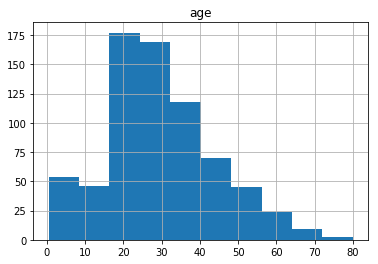

In [36]:
X.hist('age')
X.isnull().sum()

In [37]:
X['age'] = X['age'].fillna(X.age.median())
print(X.age.isnull().sum())

0


In [38]:
#one hot encoding  for variable sex

print(X.sex[:5])
X['sex'] = pd.get_dummies(X.sex)['female']
print(X.sex[:5])

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object
0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: uint8


In [39]:
X1 = X.join(pd.get_dummies(data.Pclass))
X1[:5]

,sex,age,pclass,sibsp,parch,1,2,3
0,0,22.0,3,1,0,0,0,1
1,1,38.0,1,1,0,1,0,0
2,1,26.0,3,0,0,0,0,1
3,1,35.0,1,1,0,1,0,0
4,0,35.0,3,0,0,0,0,1


In [40]:
#creating dummies of varible pclass
print(X[:5])
X = X.join(pd.get_dummies(data.Pclass , prefix = 'pclass'))
X = X.drop(['pclass_1' , 'pclass'],axis = 1)
print(X[:5])

   sex   age  pclass  sibsp  parch
0    0  22.0       3      1      0
1    1  38.0       1      1      0
2    1  26.0       3      0      0
3    1  35.0       1      1      0
4    0  35.0       3      0      0
   sex   age  sibsp  parch  pclass_2  pclass_3
0    0  22.0      1      0         0         1
1    1  38.0      1      0         0         0
2    1  26.0      0      0         0         1
3    1  35.0      1      0         0         0
4    0  35.0      0      0         0         1


In [42]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X[['age']])
print(X[:5])
print(X1[:5])
X['age'] = X1
print(X[:5])

   sex   age  sibsp  parch  pclass_2  pclass_3
0    0  22.0      1      0         0         1
1    1  38.0      1      0         0         0
2    1  26.0      0      0         0         1
3    1  35.0      1      0         0         0
4    0  35.0      0      0         0         1
[[-0.56573646]
 [ 0.66386103]
 [-0.25833709]
 [ 0.4333115 ]
 [ 0.4333115 ]]
   sex       age  sibsp  parch  pclass_2  pclass_3
0    0 -0.565736      1      0         0         1
1    1  0.663861      1      0         0         0
2    1 -0.258337      0      0         0         1
3    1  0.433312      1      0         0         0
4    0  0.433312      0      0         0         1


In [43]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.20 , random_state = 42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [45]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

     sex       age  sibsp  parch  pclass_2  pclass_3
331    0  1.240235      0      0         0         0
733    0 -0.488887      0      0         1         0
382    0  0.202762      0      0         0         1
704    0 -0.258337      1      0         0         1
813    1 -1.795334      4      2         0         1
     sex       age  sibsp  parch  pclass_2  pclass_3
709    0 -0.104637      1      1         0         1
439    0  0.125912      0      0         1         0
840    0 -0.719436      0      0         0         1
720    1 -1.795334      0      1         1         0
39     1 -1.180535      1      0         0         1
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64
709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64


In [51]:
from sklearn.linear_model import LogisticRegression
# fit the model
model = LogisticRegression()
model.fit(X_train,y_train)


C:\Users\Shubham\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
print(model.predict_proba(X_test)[:10])
print(model.predict(X_test)[:10])

[[0.91726233 0.08273767]
 [0.715232   0.284768  ]
 [0.85780653 0.14219347]
 [0.08937096 0.91062904]
 [0.33573348 0.66426652]
 [0.07352846 0.92647154]
 [0.36365924 0.63634076]
 [0.90525839 0.09474161]
 [0.28652852 0.71347148]
 [0.07107433 0.92892567]]
[0 0 0 1 1 1 1 0 1 1]


In [53]:
#compute the accuracy of our predictions
print('Logistic accuracy is %2.2f' % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.80


In [54]:
model.score(X_train,y_train)

0.8019662921348315

In [55]:
#classification report 
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [56]:
#ROC curve
logistic_roc_auc = roc_auc_score(y_test,model.predict(X_test))



In [57]:
from sklearn.metrics import roc_curve
fpr , tpr , threshold = roc_curve(y_test, model.predict_proba(X_test)[:,-1])

In [58]:
print(fpr[:5])
print(tpr[:5])
print(threshold[:5])

[0. 0. 0. 0. 0.]
[0.         0.01351351 0.09459459 0.12162162 0.14864865]
[1.93952247 0.93952247 0.92061752 0.91804792 0.91062904]


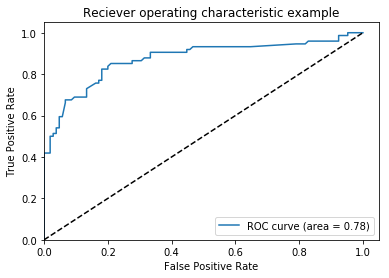

logistic AUC = 0.78


In [59]:
#plot of ROC curve
plt.figure()
plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic example')
plt.legend(loc='lower right')
plt.show()
print('logistic AUC = %2.2f' %logistic_roc_auc)